# Multilayer Perceptron (MLP)

A Multilayer Perceptron (MLP) is a neural network made of multiple perceptron layers stacked on top of each other, with a nonlinear activation function applied after each layer. By combining linear transformations with nonlinear activations, MLPs can model complex, nonlinear relationships between inputs and outputs that a single-layer perceptron cannot.

In [64]:
import numpy as np

# Activation function
def relu(x):
    return np.maximum(0, x)

# Sample input shape (2 samples, 3 features)
x = np.array([[1.0, 2.0, -1.0],
              [0.0, -1.0, 2.0]])

# Weights and biases
# W1: (3, 4), b1: (1, 4)
# W2: (4, 1), b2: (1, 1)
W1 = np.array([[1, 1, -1, 0],
               [1, 1, -1, 0],
               [1, 1, -1, 0]])  # input -> hidden (3 -> 4)
b1 = np.array([[-2, 2, 1, -1]])

W2 = np.array([[1],
               [-1],
               [-1],
               [1]])  # hidden -> output (4 -> 1)
b2 = np.zeros((1, 1))

# Forward pass
hidden = relu(x @ W1 + b1) # apply ReLU activation between layers
output = hidden @ W2 + b2

print(output)

[[-4.]
 [-3.]]


This can be done via PyTorch like follows:

In [68]:
import torch
import torch.nn as nn

# Define the MLP
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3, 4)  # input -> hidden
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(4, 1)  # hidden -> output

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Same input tensor
x = torch.tensor([
    [1.0,  2.0, -1.0],
    [0.0, -1.0,  2.0]
])

# Run model
model = MLP()
output = model(x)

print(output)


tensor([[0.5160],
        [0.3791]], grad_fn=<AddmmBackward0>)


An added benefit of using differentiable activation functions is that they allow gradients to be computed, making it possible to learn the weights using gradient-based optimization methods like backpropagation.

## MLP in action:

Example, classification:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)


class Net1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 2) # simple model to demonstrate
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x


In [3]:
model = Net1()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 200 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')


Epoch 200/1000, Loss: 0.3254
Epoch 400/1000, Loss: 0.3094
Epoch 600/1000, Loss: 0.3066
Epoch 800/1000, Loss: 0.3054
Epoch 1000/1000, Loss: 0.3049


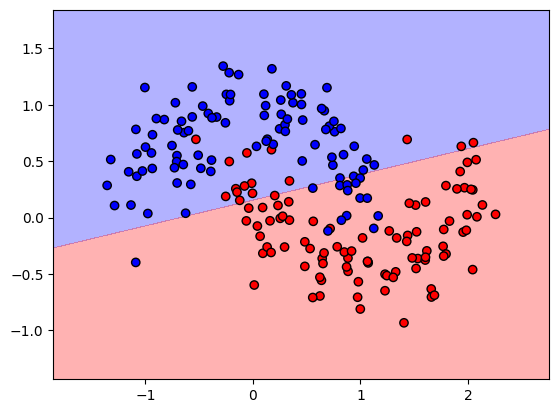

In [4]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_t = torch.tensor(grid, dtype=torch.float32)
    with torch.no_grad():
        probs = model(grid_t).numpy()
    probs = probs.reshape(xx.shape)
    
    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.3, colors=['blue', 'red'])
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr, edgecolor='k')
    plt.show()

plot_decision_boundary(model, X, y)